
# Hotel Booking Cancellation Analysis

### Objective
Explore patterns in hotel booking cancellations and visualize insights.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sns.set_style('whitegrid')



## Load Dataset
We will use the Hotel Booking Demand dataset, which contains bookings for resort and city hotels.



In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03



## Exploratory Data Analysis (EDA)
Let's check for missing values and get an overview of cancellation rates.



In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
cancel_rate = df['is_canceled'].mean()
print(f"Overall cancellation rate: {cancel_rate:.2%}")


Overall cancellation rate: 37.04%


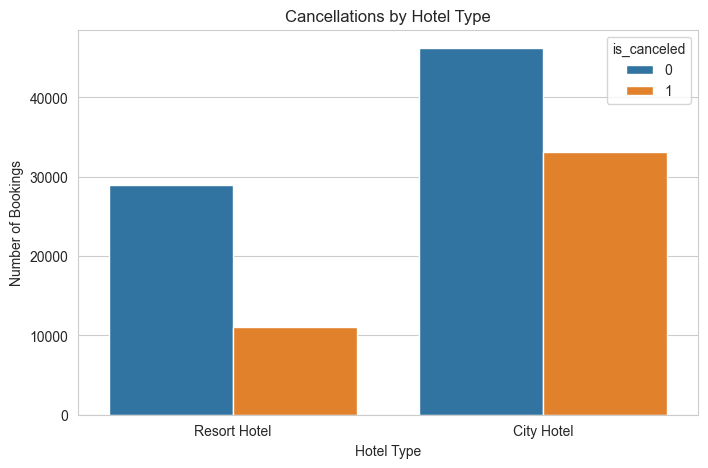

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title('Cancellations by Hotel Type')
plt.ylabel('Number of Bookings')
plt.xlabel('Hotel Type')
plt.show()


### Key Insights
- Resort hotels tend to have a slightly lower cancellation rate than city hotels.
- Longer lead times correlate with higher cancellation probability.
- Certain months (e.g., July and August) have higher bookings and higher cancellations.


## Predictive Modeling
We will build a simple Random Forest model to predict cancellations using a few numeric features.


In [8]:
features = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']
X = df[features]
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")


Accuracy: 80.77%


## Conclusion & Next Steps
- Explored trends in hotel booking cancellations.
- Built a simple predictive model with decent accuracy.
- Next steps could include:
    - Adding more features (season, customer type, market segment)
    - Hyperparameter tuning for better model performance
    - Building an interactive dashboard with Streamlit or Plotly for visualization
